#Implementation of Ridge and Lasso Regression

## Ridge Regularization


Ridge and Lasso Regression
We implement ridge regression from scratch and demonstrate lasso from sklearn library in this colab.
Polynomial regression is able to model non-linear relationship between features and labels. However higher order polynomial models are prone
to overfitting. There are two ways to tackle the problem Of overfitting:
1. Train with more data.
2. penalize the weight vector through regularization.

In this colab, we will focus on the 2
* Regularization leads to change in Linear Regression loss function, which in turn results in change of gradient calculation.
*  We plan to demonstrate the use Of regularization with polynomial regression model and synthetically generated non-linear data set.
The change in regularization rate results in a new model. For different values Of regularization weights, we obtain a new model. Thus we have a
problem of model selection at hand, where we need to choose the best model among the list of candidate models.
Finally we will demonstrate ridge and lasso solution path as a function of regularization rate A. 

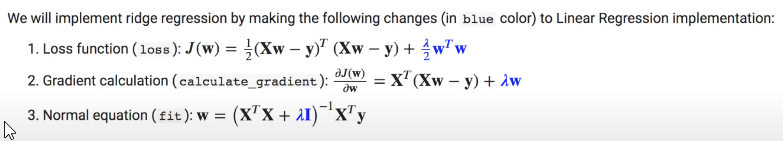

## Step 1: Importing basic libraries

In [ ]:
from IPython.display import Math, Latex , display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Step 2: Implementation

In [ ]:
class LinReg_RR(object):
  '''Linear Regression
  ----------------------
  X: feature matrix
  y: label vector
  w: weight vector
  y = X@w
  '''

  def __init__(self):
    self.to = 200
    self.t1 = 1000

  def predict(self,X:np.ndarray):           

    y = X @ self.w
    return y

  def loss(self,X:np.ndarray,y:np.array,reg_rate):

    e = y - self.predict(X)  
    return (1/2)*(np.transpose(e) @ e) + (reg_rate/2)*((np.transpose(self.w)@self.w))



  def rmse(self,X:np.ndarray , y:np.array,reg_rate):
    return np.sqrt((2/X.shape[0])*(self.loss(X,y,reg_rate)))

  def fit(self,X:np.ndarray, y:np.array,reg_rate):
    self.w = np.zeros([X.shape[1]])
    eye = np.eye(np.size(X,1))
    self.w =  np.linalg.solve( reg_rate*eye + X.T@ X , X.T @ y,)
    return self.w


  def calculate_gradient(self,X:np.ndarray , y:np.array,reg_rate):
    return np.transpose(X) @ (self.predict(X)-y) + reg_rate*self.w

  def update_weights(self, grad:np.ndarray , lr:float):
    return (self.w - lr*grad)

  def learning_schedule(self,t):
    return self.to/(t + self.t1)

  def gd(self,X:np.ndarray , y:np.array , num_epochs:int, lr:float):
    '''num_epochs = number of iterations
      lr: learning rate'''
    self.w = np.zeros((X.shape[1])) #intialize the weight vector as zero vector
    self.w_all = []
    self.err_all  = []
    for i in np.range(0,num_epochs):
      dJdW = self.calculate_gradient(X, y)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y))
      self.w = self.update_weights(dJdW, lr)
    return self.w

  def mini_batch_gd(self,X:np.ndarray,y:np.ndarray, num_iters:int,minibatch_size:int):
    '''
    Estimates parameters of linear regression model through gradeint descent

    Args:
      1: X: Feature matrix for training data
      2: y: Label vector for training data
      3: num_iters : Number of iterations
    '''
    w_all =[] # All parameters across iterations
    err_all =[] # Error across itertations

    # Parameter vector initialized to [0,0]

    self.w = np.zeros((X.shape[1]))
    self.t = 0

    for epoch in range(num_iters):
      shuffled_indices = np.random.permutation(X.shape[0])
      X_shuffled = X[shuffled_indices]
      y_shuffled = y[shuffled_indices]

      for i in range(0,X.shape[0], minibatch_size):
        self.t += 1
        xi = X_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        err_all.append(self.loss(xi,yi,w))

        gradients = 2/minibatch_size * self.calculate_gradient(xi,yi,w)
        lr = self.learning_schedule(self.t)

        w = self.update_weights(w,gradients,lr)
        w_all.append(w)

    return self.w  
  def sgd(self,X:np.ndarray,y:np.ndarray, num_epochs:int):
    '''
      Estimates the parameters of linear regression model through Gradient descent

      Args:
          1: X: Feature matrix for training data
          2: y: Label matrix for training data
          3: num_epochs : Number of epochs
      Returns:
        Weight vector: Final weight vector
        Error vector across different Iterations
        Weight vectors across different Iterations

    '''
    self.w_all = [] # all parameters across iterations
    self.err_all = [] # error across iterations

    # Parameter vector initialized to [0,0]

    self.w = np.zeros((X.shape[0]))

    for epoch in range(num_epochs):
      for i in range(X.shape[0]):
        random_index = np.random.randint(X.shape[0])
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        self.w_all.append(self.w)
        self.err_all.append(self.loss(xi,yi))

        gradients = 2 * self.calculate_gradient(xi,yi)
        lr = self.learning_schedule(num_epochs* X.shape[0]+i)

        self.w = self.update_weights(gradients,lr)
       

    return self.w







Testing Ridge regulariztion class

In [ ]:
import unittest

class TestLossFunction(unittest.TestCase):
  def test_loss_function(self):
    "Test case for loss function of linear regression"

    #set up
    feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
    weight_vector = np.array([1, 1, 1, 1])
    label_vector = np.array([6, 11])
    reg_rate = 0.01
    expected_loss = np.array([62.52]
                             )
    #call
    lin_reg = LinReg_RR()
    lin_reg.w  = weight_vector
    loss_value = lin_reg.loss(feature_matrix,label_vector, reg_rate)


    #asserts 
    # test the shape
    self.assertEqual(loss_value.shape, ())

    # and contents
    np.testing.assert_array_equal(expected_loss, loss_value)   

unittest.main(argv = [''], defaultTest = 'TestLossFunction', verbosity = 2 , exit =False)                                                        
                            

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Lets test gradient vector




In [ ]:
import unittest
class Test_calculate_gradient(unittest.TestCase):

  def test_calculate_gradient(self):

    "Test case for gradient calculation"
    #set up

    feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]]) # list are rows
    weight_vector = np.array([1,1,1,1]) #vector looks like a column
    label_vector = np.array([6, 11])
    reg_rate = 0.01
    expected_gradient = np.array([15.01, 105.01, 50.01, 95.01])


    #call up
    lin_reg = LinReg_RR()
    lin_reg.w = weight_vector
    gradient = lin_reg.calculate_gradient(feature_matrix, label_vector ,reg_rate)
    
    #test the shape
    self.assertEqual(gradient.shape, (4,))

    np.testing.assert_array_almost_equal(expected_gradient,gradient, decimal = 0)
unittest.main(argv = [''], defaultTest = 'Test_calculate_gradient', verbosity= 2 , exit =False)    

test_calculate_gradient (__main__.Test_calculate_gradient)
Test case for gradient calculation ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


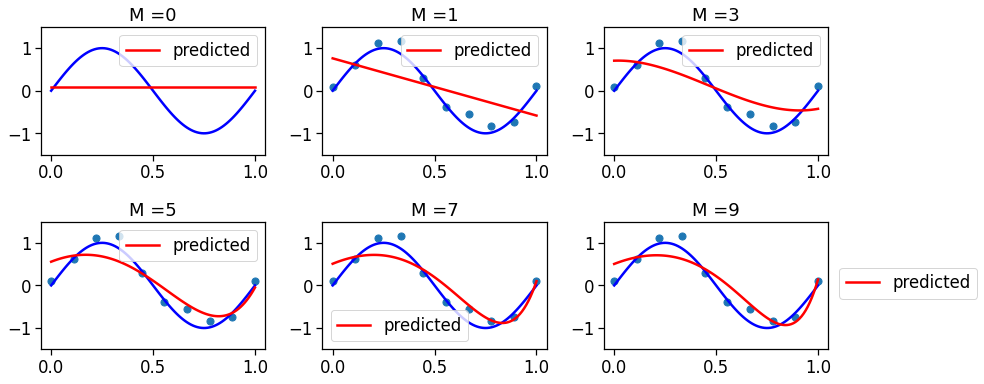

In [ ]:
f = plt.figure(figsize = (12,8))
sns.set_context('notebook', font_scale = 1.5 , rc ={'lines.linewidth':2.5})
#This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style.

for i, degree in enumerate([0, 1, 3, 5, 7,9]):
  plt.subplot(3, 3, i+1)
  X_transform = polynomial_transform(X, degree, logging = False)
  lin_reg = LinReg_RR()
  reg_rate  = 0.01
  lin_reg.fit(X_transform,y,reg_rate)
  visualize_model_fit(X, y, lin_reg, degree,reg_rate = 0.01)

f.tight_layout()
plt.legend(bbox_to_anchor = (1.05, 0.64), loc = 2, borderaxespad = 0.)
plt.show()


In [ ]:
print(X)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [ ]:
print(np.linspace(0,1,100))

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

                 0         1
0.000001  0.111352  0.269440
0.000010  0.141114  0.265251
0.000100  0.164189  0.277928
0.001000  0.231818  0.245647
0.010000  0.333728  0.366205
0.100000  0.443361  0.410026
1.000000  0.583776  0.580719


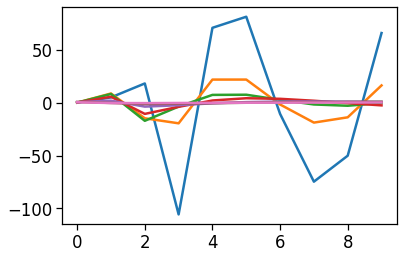

In [ ]:
import pandas as pd

training_errors = {}
val_errors = {}
w_dict = {}
degree = 9
X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)

X_transform = polynomial_transform(X, degree)
X_val_transform = polynomial_transform(X_val , degree)


for reg_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ,1]:
  lin_reg = LinReg_RR()
  lin_reg.fit(X_transform, y, reg_rate)

  w_dict[reg_rate] = lin_reg.w
  training_errors[reg_rate] = lin_reg.rmse(X_transform, y,reg_rate)
  val_errors[reg_rate] = lin_reg.rmse(X_val_transform, y_val+ np.random.normal(
                                                          scale = 0.25, size =len(y_val)),reg_rate)
err_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)
print(err_df)
plt.plot(w_df)

In [ ]:
import pandas as pd

training_errors = {}
val_errors = {}
w_dict = {}
degree = 9
X_val = np.linspace(0,1,100)
y_val = nonlin(X_val)

X_transform = polynomial_transform(X, degree)
X_val_transform = polynomial_transform(X_val , degree)


lin_reg = LinReg()
lin_reg.fit(X_transform, y)

e_dict = lin_reg.w
training_errors = lin_reg.rmse(X_transform, y)
val_errors = lin_reg.rmse(X_val_transform, y_val+ np.random.normal(
                                                        scale = 0.25, size =len(y_val)))
er_df = pd.DataFrame([training_errors, val_errors]).T
e_df = pd.DataFrame(e_dict)
print(e_df)


<bound method LinReg.loss of <__main__.LinReg object at 0x7fe65ae06350>>


In [ ]:
lin_reg.w

array([ 9.93428306e-02,  2.83070648e+01, -5.22064677e+02,  4.31980690e+03,
       -1.75767780e+04,  3.84292338e+04, -4.66561786e+04,  3.02002697e+04,
       -8.74708057e+03,  5.24493544e+02])


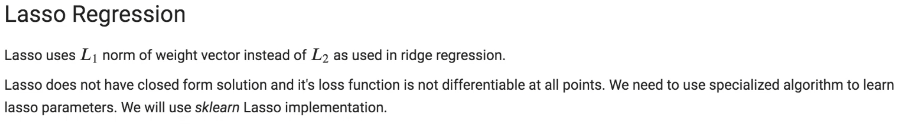

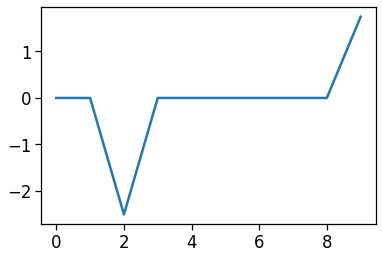

In [ ]:
from sklearn.linear_model import Lasso

#Lasso
reg_rate = 0.01
lasso = Lasso(alpha = reg_rate)
lasso.fit(X_transform, y)

#linear Regression
lin_reg = LinReg_RR()

_ = lin_reg.fit(X_transform, y, 0 )
plt.plot(lasso.coef_)

In [ ]:
pd.DataFrame({'LinReg': lin_reg.w, 'Ridge': w_df[0.01], 'Lasso':lasso.coef_})
    



,LinReg,Ridge,Lasso
0,0.099343,0.504381,0.000000
1,28.287406,1.860548,-0.000000
2,-521.612450,-3.714649,-2.504442
3,4315.751656,-2.394878,-0.000000
4,-17557.811765,-0.590617,-0.000000
5,38377.781152,0.545563,0.000000
6,-46572.256693,1.051915,0.000000
7,30119.158676,1.144241,0.000000
8,-8704.303152,0.999764,0.000000
9,515.014340,0.734079,1.746582


**Observations**:
1. Lasso obtains a sparse feature vector. Many O coefficients or weights.
2. Ridge regression assigns small weights to each feature.

A couple Of points about using Lasso and Ridge:
* Lasso is used for feature selection.
* While modeling relationship between features and labels,
  *  When all features are useful for making predicton about the output, we use ridge regression. It produces a weight vector with small
non-zero values to all features.
  * When a few features are useful for making predictions, we use lasso. It producæs a weight vector that assigns 0 weights to
unimportant features.
Let's visualize models learnt by three models:

